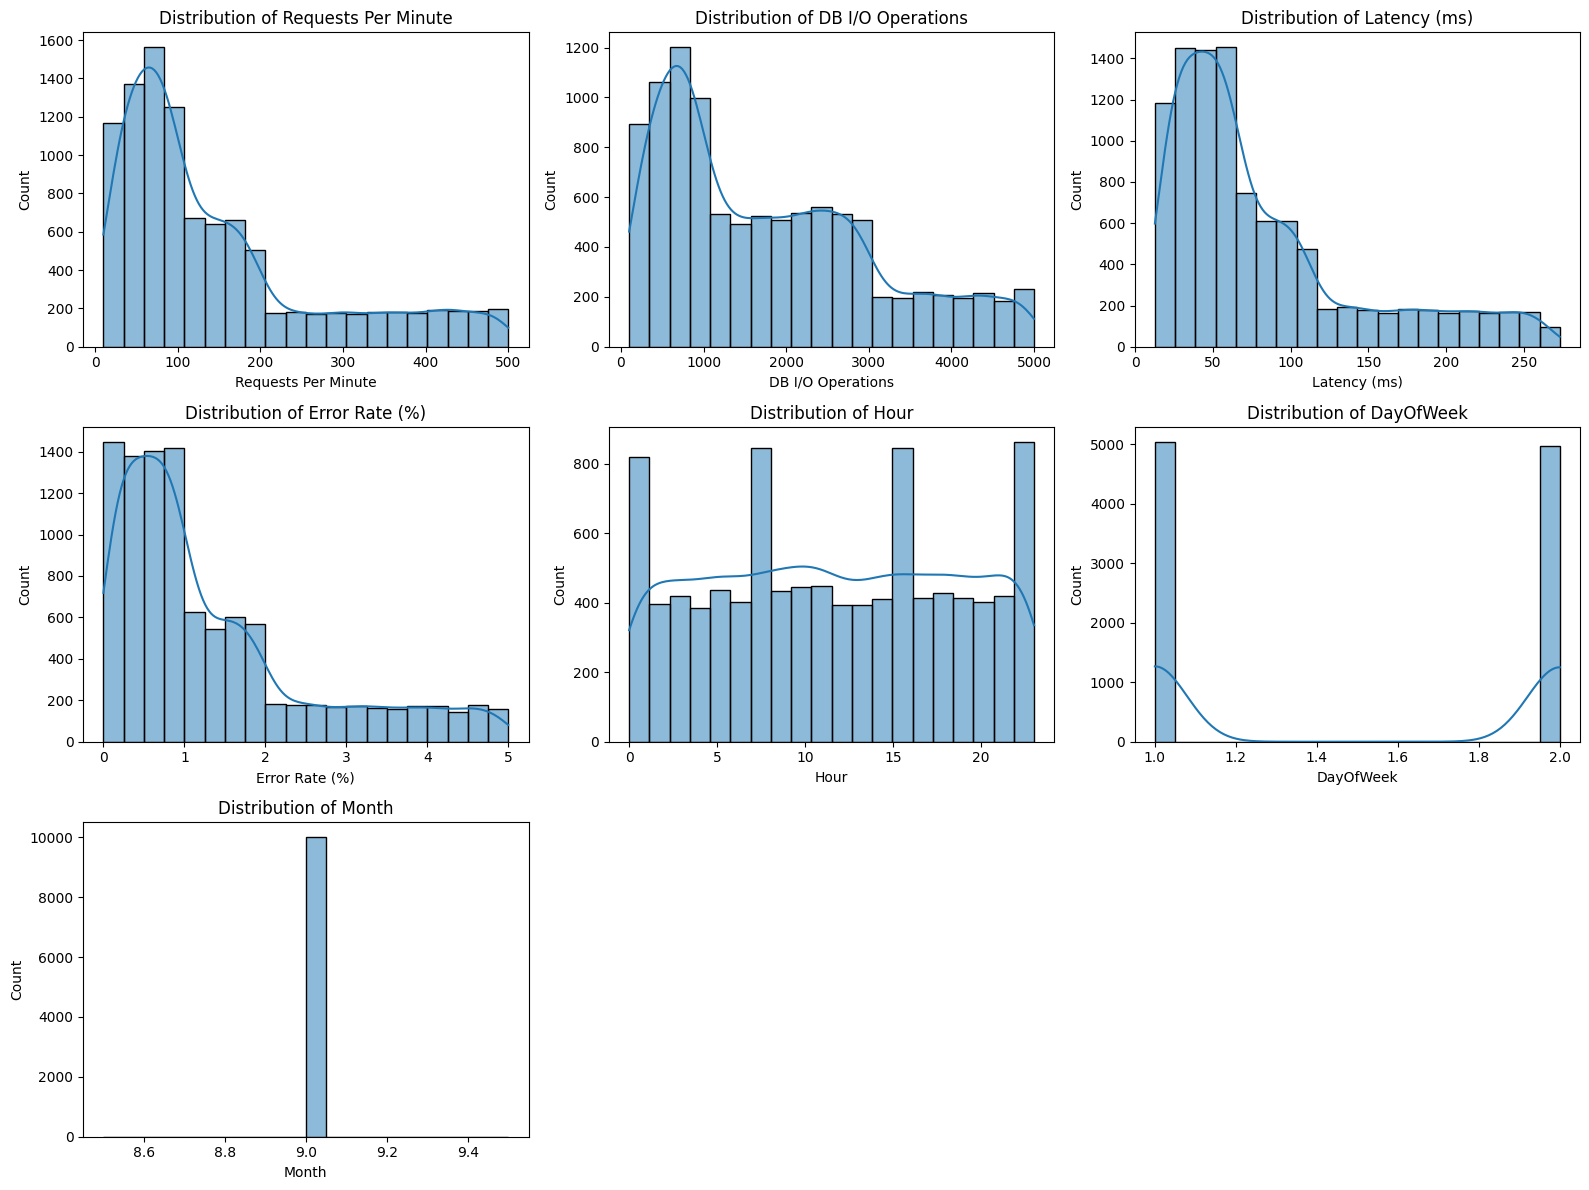

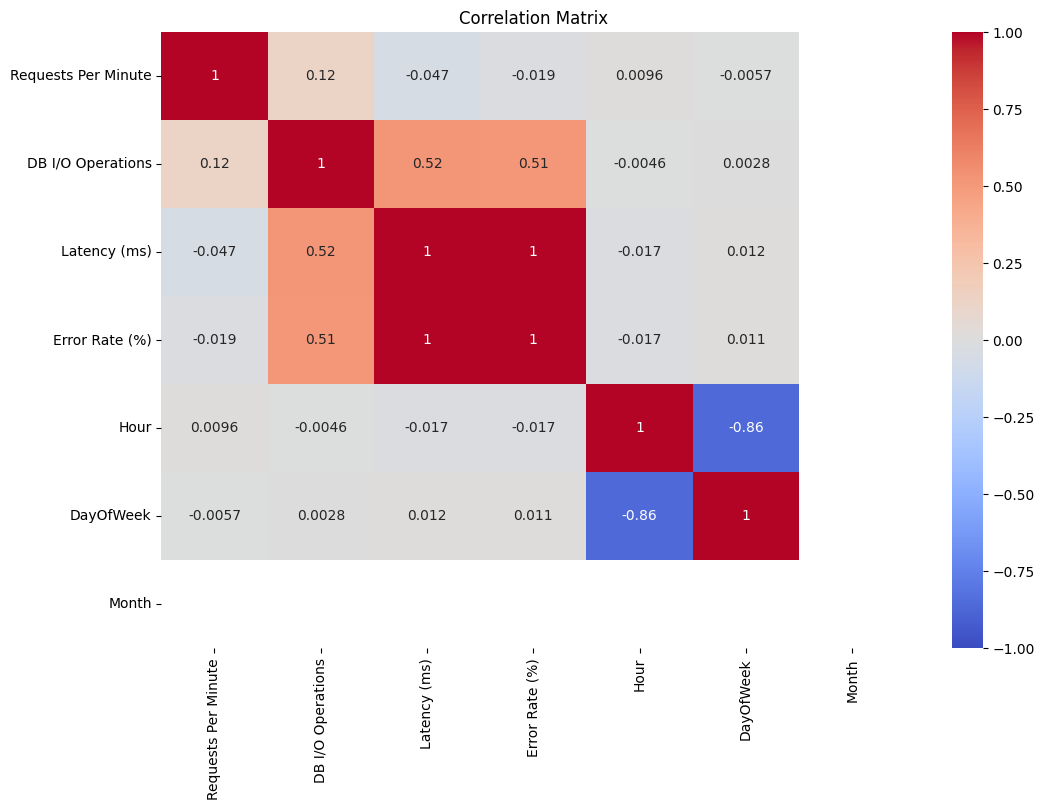

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# 1. התפלגות התכונות המספריות (לפני הכניסה למודל)
def plot_numerical_distributions(data, numerical_features):
    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[feature], bins=20, kde=True)
        plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.show()

# 2. ניתוח הקורלציה בין תכונות מספריות
def plot_correlation_matrix(data):
    corr = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

# 3. השוואה בין ערכי התחזיות לערכים האמיתיים (תוצאות המודל)
def plot_model_results(y_test, y_pred, target_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel(f'Actual {target_name}')
    plt.ylabel(f'Predicted {target_name}')
    plt.title(f'Actual vs Predicted {target_name}')
    plt.show()

# 4. הצגת שגיאות עבור CPU ו-RAM
def plot_prediction_errors(y_test, y_pred, target_name):
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, bins=20, kde=True)
    plt.title(f'Error Distribution for {target_name}')
    plt.xlabel(f'Error in {target_name}')
    plt.ylabel('Frequency')
    plt.show()


train_data = pd.read_csv('improved_aws_resource_usage_training.csv')
test_data = pd.read_csv('improved_aws_resource_usage_testing.csv')

# עיבוד עמודת הזמן והוספת עמודות שעה, יום, וחודש (במידה והן לא קיימות)
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])
train_data['Hour'] = train_data['Timestamp'].dt.hour
train_data['DayOfWeek'] = train_data['Timestamp'].dt.dayofweek
train_data['Month'] = train_data['Timestamp'].dt.month

test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])
test_data['Hour'] = test_data['Timestamp'].dt.hour
test_data['DayOfWeek'] = test_data['Timestamp'].dt.dayofweek
test_data['Month'] = test_data['Timestamp'].dt.month

# מחיקת עמודת ה-Timestamp המקורית
train_data = train_data.drop(columns=['Timestamp'])
test_data = test_data.drop(columns=['Timestamp'])

# הפרדת המאפיינים והיעדים בקובץ האימון
X_train = train_data.drop(columns=['CPU Usage (%)', 'RAM Usage (GB)', 'User ID'])
y_train = train_data[['CPU Usage (%)', 'RAM Usage (GB)']]

# הפרדת המאפיינים והיעדים בקובץ הבדיקה
X_test = test_data.drop(columns=['CPU Usage (%)', 'RAM Usage (GB)', 'User ID'])
y_test = test_data[['CPU Usage (%)', 'RAM Usage (GB)']]

# Define numerical and categorical features
numerical_features = ['Requests Per Minute', 'DB I/O Operations', 'Latency (ms)', 'Error Rate (%)', 'Hour', 'DayOfWeek', 'Month']
categorical_features = ['Group ID', 'Task Type']


# 1. התפלגות התכונות המספריות
plot_numerical_distributions(train_data, numerical_features)

# 2. טבלת קורלציה
plot_correlation_matrix(train_data[numerical_features])



RandomForest MSE: 0.96054368116289
RandomForest MAE: 0.7671334951644332
RandomForest R2: 0.9994867649622796


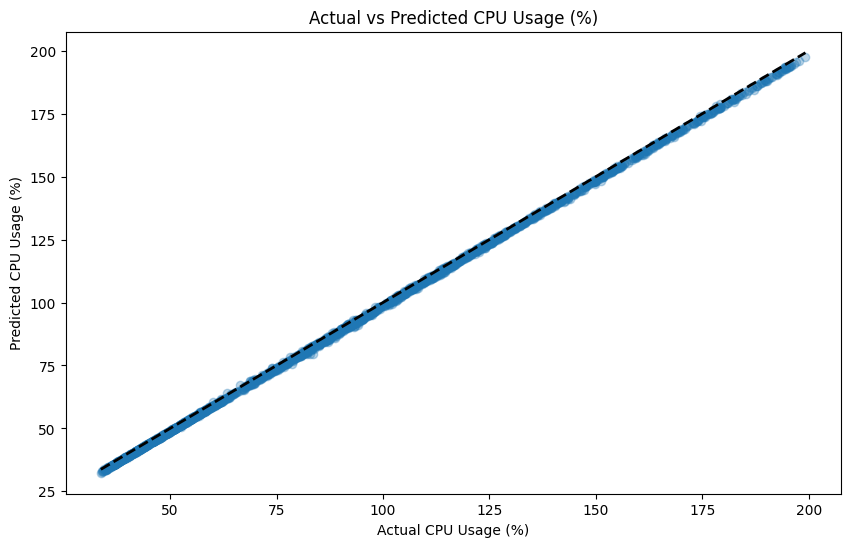

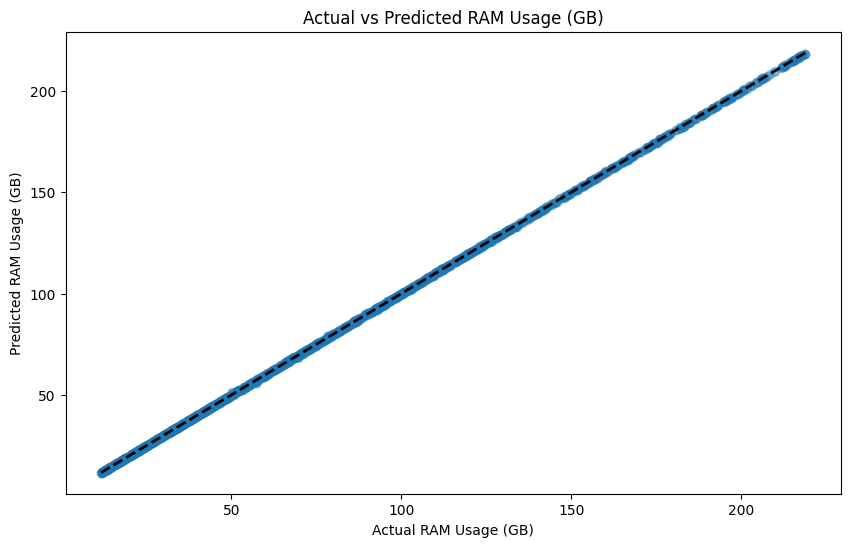

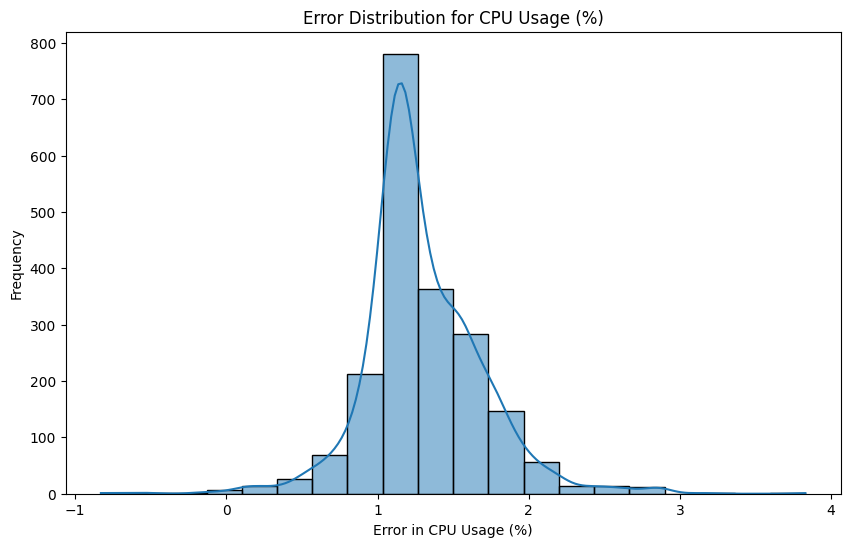

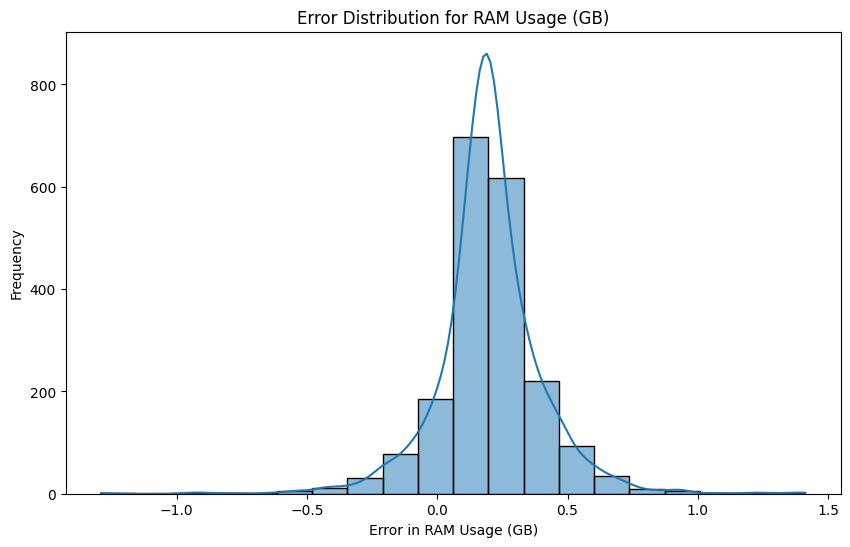

In [5]:
# Preprocessing: Standardize numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"RandomForest MSE: {rf_mse}")
print(f"RandomForest MAE: {rf_mae}")
print(f"RandomForest R2: {rf_r2}")

# 3. תוצאות המודל - CPU ו-RAM
plot_model_results(y_test['CPU Usage (%)'], rf_predictions[:, 0], 'CPU Usage (%)')
plot_model_results(y_test['RAM Usage (GB)'], rf_predictions[:, 1], 'RAM Usage (GB)')

# 4. שגיאות תחזית - CPU ו-RAM
plot_prediction_errors(y_test['CPU Usage (%)'], rf_predictions[:, 0], 'CPU Usage (%)')
plot_prediction_errors(y_test['RAM Usage (GB)'], rf_predictions[:, 1], 'RAM Usage (GB)')